<a href="https://colab.research.google.com/github/EduHdzVillasana/Procesamiento_MCD/blob/main/Tarea%202/Tarea_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
import pandas as pd
import numpy as np
import re
import nltk
import matplotlib.pyplot as plt
nltk.download('stopwords')
nltk.download('punkt_tab')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Maestria en Ciencia de Datos/Procesamiento de Datos/Clase 2/amazon.csv')

In [4]:
df

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1460,B08L7J3T31,Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...,Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...,₹379,₹919,59%,4,"1,090",SUPREME QUALITY 90 GRAM 3 LAYER THIK PP SPUN F...,"AHITFY6AHALOFOHOZEOC6XBP4FEA,AFRABBODZJZQB6Z4U...","Prabha ds,Raghuram bk,Real Deal,Amazon Custome...","R3G3XFHPBFF0E8,R3C0BZCD32EIGW,R2EBVBCN9QPD9R,R...","Received the product without spanner,Excellent...","I received product without spanner,Excellent p...",https://m.media-amazon.com/images/I/41fDdRtjfx...,https://www.amazon.in/Noir-Aqua-Spanner-Purifi...
1461,B01M6453MB,Prestige Delight PRWO Electric Rice Cooker (1 ...,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,"₹2,280","₹3,045",25%,4.1,"4,118","230 Volts, 400 watts, 1 Year","AFG5FM3NEMOL6BNFRV2NK5FNJCHQ,AGEINTRN6Z563RMLH...","Manu Bhai,Naveenpittu,Evatira Sangma,JAGANNADH...","R3DDL2UPKQ2CK9,R2SYYU1OATVIU5,R1VM993161IYRW,R...","ok,everything was good couldn't return bcoz I ...","ok,got everything as mentioned but the me

In [5]:
df = df[["product_name","rating", "review_content"]]

In [6]:
def tokenizar(text):
    texto_limpio = re.sub(r'[^\w\s]', '', text.lower())
    stop_words = set(stopwords.words('english'))
    tokens = word_tokenize(texto_limpio)
    texto_filtrado = [word for word in tokens if word not in stop_words]
    return texto_filtrado

In [9]:
df.sample(10)

,product_name,rating,review_content
1268,HUL Pureit Germkill kit for Advanced 23 L wate...,4.2,"Ok,For replacing battery of Purit 23 advanced ..."
386,"OPPO A74 5G (Fantastic Purple,6GB RAM,128GB St...",4.2,"I like it,Great phone in smaller amount these ..."
862,Noise ColorFit Ultra Buzz Bluetooth Calling Sm...,4.1,"Taking to school or exercise,Must buy it if u'..."
646,SanDisk Ultra 128 GB USB 3.0 Pen Drive (Black),4.3,Speed is overall good as per its price. But no...
921,Canon PIXMA MG2577s All-in-One Inkjet Colour P...,3.4,the color cartridge ink levels were low during...
1391,"Lifelong LLSM120G Sandwich Griller , Classic P...",3.9,* Easy and quick heating* Price 1099 is best i...
513,"OnePlus Nord Watch with 1.78” AMOLED Display, ...",3.8,I really suprise there is no Bluetooth calling...
225,Remote Compatible for Samsung LED/LCD Remote C...,3.7,Cheap price.... Looks good..... Value for mone...
1362,JIALTO Mini Waffle Maker 4 Inch- 350 Watts: St...,4,It’s easy to use and amazing product by amazon...
524,STRIFF Multi Angle Tablet/Mobile Stand. Holder...,4.1,Perfect for a 10 inch tablet both vertically a...


In [10]:
df["token"] = df["review_content"].apply(tokenizar)

<ipython-input-10-073bfddea918>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["token"] = df["review_content"].apply(tokenizar)


In [11]:
df.sample(10)

,product_name,rating,review_content,token
255,VU 164 cm (65 inches) The GloLED Series 4K Sma...,4.3,",Screen quality is good.It's been a month I bo...","[screen, quality, goodits, month, bought, stil..."
1443,"PHILIPS Drip Coffee Maker HD7432/20, 0.6 L, Id...",4,Alignment between mug and top springi is not g...,"[alignment, mug, top, springi, good, resulted,..."
452,"OPPO A31 (Mystery Black, 6GB RAM, 128GB Storag...",4.2,"I like this product,It's okay for a backup eme...","[like, productits, okay, backup, emergency, ph..."
997,Inventis 5V 1.2W Portable Flexible USB LED Lig...,3.6,"very good product, very bright, easy to use, i...","[good, product, bright, easy, use, worked, pro..."
1073,Orient Electric Fabrijoy DIFJ10BP 1000-Watt Dr...,4.2,"Good press,Nice product,Good,Yes,It is a use a...","[good, pressnice, productgoodyesit, use, throw..."
695,"rts [2 Pack] Mini USB C Type C Adapter Plug, T...",4.3,This eliminates the need to buy chargers for t...,"[eliminates, need, buy, chargers, new, usbc, c..."
142,LRIPL Mi Remote Control with Netflix & Prime V...,3.2,TV remote is the replica of the original one s...,"[tv, remote, replica, original, one, supplied,..."
1429,Wipro Vesta 1380W Cordless Steam Iron Quick he...,3.6,"The iron had water still inside it, the plasti...","[iron, water, still, inside, plastic, clips, h..."
376,Noise ColorFit Pro 4 Advanced Bluetooth Callin...,4.1,1. Please add app gallery when we do right to ...,"[1, please, add, app, gallery, right, left, sw..."
502,Noise Pulse 2 Max Advanced Bluetooth Calling S...,4.1,Linking the smart watch to my mobile phone was...,"[linking, smart, watch, mobile, phone, seamles..."


In [12]:
lexicon = pd.read_table(
            'https://raw.githubusercontent.com/fnielsen/afinn/master/afinn/data/AFINN-en-165.txt',
            names = ['termino', 'sentimiento']
          )
lexicon.head()

,termino,sentimiento
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2


In [29]:
df_tokens = df.explode(column='token').drop(columns = ["rating","review_content"])
df_tokens

,product_name,token
0,Wayona Nylon Braided USB to Lightning Fast Cha...,looks
0,Wayona Nylon Braided USB to Lightning Fast Cha...,durable
0,Wayona Nylon Braided USB to Lightning Fast Cha...,charging
0,Wayona Nylon Braided USB to Lightning Fast Cha...,fine
0,Wayona Nylon Braided USB to Lightning Fast Cha...,toono
...,...,...
1464,Borosil Jumbo 1000-Watt Grill Sandwich Maker (...,work
1464,Borosil Jumbo 1000-Watt Grill Sandwich Maker (...,expectedits
1464,Borosil Jumbo 1000-Watt Grill Sandwich Maker (...,easy
1464,Borosil Jumbo 1000-Watt Grill Sandwich Maker (...,tp


In [31]:
df_sentimiento = df_tokens.merge(lexicon, how = "left", left_on = "token", right_on = "termino").fillna(0)
df_sentimiento

,product_name,token,termino,sentimiento
0,Wayona Nylon Braided USB to Lightning Fast Cha...,looks,0,0.0
1,Wayona Nylon Braided USB to Lightning Fast Cha...,durable,durable,2.0
2,Wayona Nylon Braided USB to Lightning Fast Cha...,charging,0,0.0
3,Wayona Nylon Braided USB to Lightning Fast Cha...,fine,fine,2.0
4,Wayona Nylon Braided USB to Lightning Fast Cha...,toono,0,0.0
...,...,...,...,...
200029,Borosil Jumbo 1000-Watt Grill Sandwich Maker (...,work,0,0.0
200030,Borosil Jumbo 1000-Watt Grill Sandwich Maker (...,expectedits,0,0.0
200031,Borosil Jumbo 1000-Watt Grill Sandwich Maker (...,easy,easy,1.0
200032,Borosil Jumbo 1000-Watt Grill Sandwich Maker (...,tp,0,0.0


In [35]:
df_sentimiento_gby = pd.DataFrame(df_sentimiento[["product_name", "sentimiento"]].groupby("product_name").mean()).reset_index()
df_sentimiento_gby

,product_name,sentimiento
0,!!1000 Watt/2000-Watt Room Heater!! Fan Heater...,0.220339
1,!!HANEUL!!1000 Watt/2000-Watt Room Heater!! Fa...,0.507692
2,10WeRun Id-116 Bluetooth Smartwatch Wireless F...,0.380000
3,"10k 8k 4k HDMI Cable, Certified 48Gbps 1ms Ult...",0.243902
4,"3M Post-it Sticky Note Cube, 200 Sheets (4 Col...",0.137931
...,...,...
1332,realme Buds Wireless in Ear Bluetooth Earphone...,0.158465
1333,"realme narzo 50 (Speed Blue, 4GB RAM+64GB Stor...",0.124506
1334,"realme narzo 50i (Mint Green, 2GB RAM+32GB Sto...",0.447368
1335,"rts [2 Pack] Mini USB C Type C Adapter Plug, T...",0.150000


In [49]:
df_sentiment_analysis = df.merge(df_sentimiento_gby, how = "left", on = "product_name")
df_sentiment_analysis

,product_name,rating,review_content,token,sentimiento
0,Wayona Nylon Braided USB to Lightning Fast Cha...,4.2,Looks durable Charging is fine tooNo complains...,"[looks, durable, charging, fine, toono, compla...",0.388889
1,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,4.0,I ordered this cable to connect my phone to An...,"[ordered, cable, connect, phone, android, auto...",0.192982
2,Sounce Fast Phone Charging Cable & Data Sync U...,3.9,"Not quite durable and sturdy,https://m.media-a...","[quite, durable, sturdyhttpsmmediaamazoncomima...",0.800000
3,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,4.2,"Good product,long wire,Charges good,Nice,I bou...","[good, productlong, wirecharges, goodnicei, bo...",0.288889
4,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,4.2,"Bought this instead of original apple, does th...","[bought, instead, original, apple, work, 150rs...",0.120833
...,...,...,...,...,...
1460,Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...,4,"I received product without spanner,Excellent p...","[received, product, without, spannerexcellent,...",0.276596
1461,Prestige Delight PRWO Electric Rice Cooker (1 ...,4.1,"ok,got everything as mentioned but the measuri...","[okgot, everything, mentioned, measuring, cup,...",0.050505
1462,Bajaj Majesty RX10 2000 Watts Heat Convector R...,3.6,"plastic but cool body ,u have to find sturdy s...","[plastic, cool, body, u, find, sturdy, surface...",0.074468
1463,Havells Ventil Air DSP 230mm Exhaust Fan (Pist...,4,I have installed this in my kitchen working fi...,"[installed, kitchen, working, fine, fan, speed...",0.200000


In [50]:
df_sentiment_analysis["rating"] = df_sentiment_analysis["rating"].apply(lambda x: x if x != "|" else 0)

In [53]:
df_sentiment_analysis["rating"] = df_sentiment_analysis["rating"].astype(float)

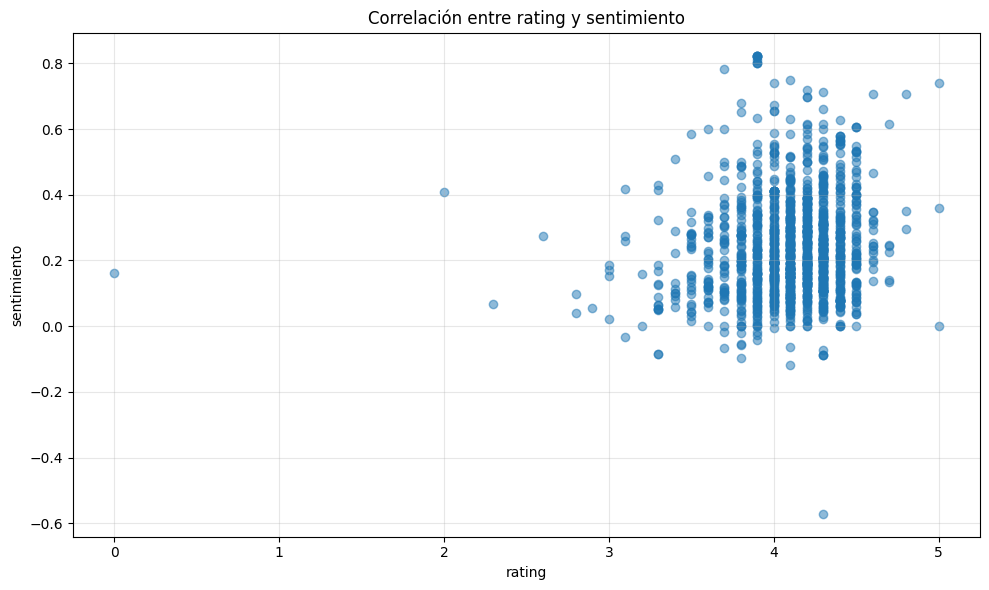

In [55]:
# Crear la figura y los ejes
plt.figure(figsize=(10, 6))

# Crear el gráfico de dispersión
plt.scatter(df_sentiment_analysis["rating"], df_sentiment_analysis["sentimiento"], alpha=0.5)

# Personalizar el gráfico
plt.xlabel("rating")
plt.ylabel("sentimiento")

plt.title(f"Correlación entre rating y sentimiento")

# Añadir cuadrícula
plt.grid(True, alpha=0.3)

# Ajustar los márgenes
plt.tight_layout()


<Axes: >

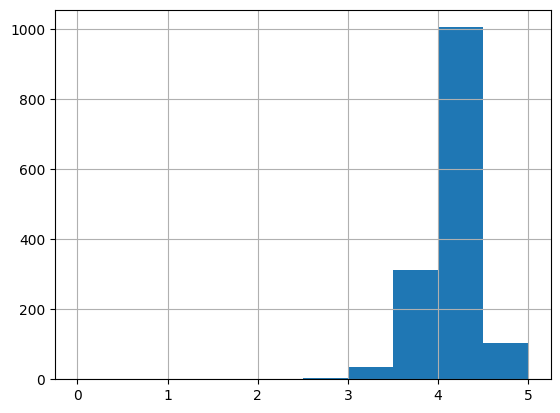

In [56]:
df_sentiment_analysis["rating"].hist()

<Axes: >

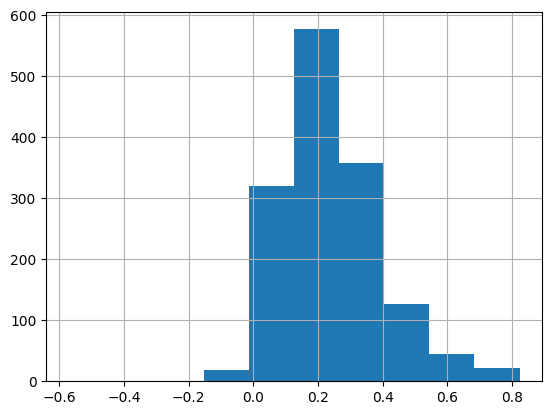

In [57]:
df_sentiment_analysis["sentimiento"].hist()